In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
NHL_Team=pd.read_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-Correlation/data/NHL_team.csv")
display(NHL_Team)

,Unnamed: 0,tid,name,tname,lname,tricode,abbr,sname
0,1,1,Toronto Maple Leafs,Maple Leafs,Toronto,TOR,TOR,Toronto
1,2,2,Montréal Canadiens,Canadiens,Montréal,MTL,MTL,Montréal
2,3,4,Winnipeg Jets,Jets,Winnipeg,WPG,WPG,Winnipeg
3,4,5,Washington Capitals,Capitals,Washington,WSH,WSH,Washington
4,5,6,Chicago Blackhawks,Blackhawks,Chicago,CHI,CHI,Chicago
5,6,7,St. Louis Blues,Blues,St. Louis,STL,STL,St Louis
6,7,8,Pittsburgh Penguins,Penguins,Pittsburgh,PIT,PIT,Pittsburgh
7,8,10,Edmonton Oilers,Oilers,Edmonton,EDM,EDM,Edmonton
8,9,11,Calgary Flames,Flames,Calgary,CGY,CGY,Calgary
9,10,14,Philadelphia Flyers,Flyers,Philadelphia,PHI,PHI,Philadelphia


In [3]:
NHL_Team.drop(['Unnamed: 0'], axis=1, inplace=True)
NHL_Team.drop(['abbr'], axis=1, inplace=True)
NHL_Team.drop(['tname'], axis=1, inplace=True)
NHL_Team.drop(['lname'], axis=1, inplace=True)
NHL_Team.drop(['sname'], axis=1, inplace=True)
NHL_Team.rename(columns={'name':'team_name'}, inplace=True)

In [38]:
NHL_Competition=pd.read_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-Correlation/data/NHL_competition.csv")
NHL_Competition

,Unnamed: 0,comp_id,year,type,name,tz,start,end
0,1,1,2013,2,2013 NHL Regular Season,ET,NaN,NaN
1,2,2,2017,2,2017 NHL Regular Season,ET,NaN,NaN
2,3,2453,2013,3,2013 NHL Playoff,ET,NaN,NaN
3,4,2541,2017,3,2017 NHL Playoff,ET,NaN,NaN
4,5,2661,2012,2,2012 NHL Regular Season,ET,NaN,NaN
5,6,2734,2016,2,2016 NHL Regular Season,ET,NaN,NaN
6,7,4099,2012,3,2012 NHL Playoff,ET,NaN,NaN
7,8,4287,2011,2,2011 NHL Regular Season,ET,NaN,NaN
8,9,5181,2016,3,2016 NHL Playoff,ET,NaN,NaN
9,10,5385,2015,2,2015 NHL Regular Season,ET,NaN,NaN


In [5]:
NHL_Competition.drop(['Unnamed: 0'], axis=1, inplace=True)
NHL_Competition.drop(['tz'], axis=1, inplace=True)
NHL_Competition.drop(['start'], axis=1, inplace=True)
NHL_Competition.drop(['end'], axis=1, inplace=True)
NHL_Competition.rename(columns={'name':'competition_name'}, inplace=True)

In [6]:
NHL_Game=pd.read_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-Correlation/data/NHL_game.csv")
NHL_Game.head()

,X,gid,comp_id,date,ascore,hscore,period,status,home_away,tid
0,1,37,2,10/7/2017,NaN,NaN,NaN,NaN,away,25
1,2,67,2,10/9/2017,NaN,NaN,NaN,NaN,away,29
2,3,154,1,10/14/2013,NaN,NaN,NaN,NaN,away,29
3,4,278,1,10/24/2013,NaN,NaN,NaN,NaN,away,53
4,5,291,1,10/25/2013,NaN,NaN,NaN,NaN,away,5


In [7]:
NHL_Game.drop(['X'], axis=1, inplace=True)
NHL_Game.drop(['period'], axis=1, inplace=True)
NHL_Game.drop(['status'], axis=1, inplace=True)

In [8]:
NHL_Game=pd.merge(NHL_Team, NHL_Game, on=['tid'])
NHL_Game.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away
0,1,Toronto Maple Leafs,TOR,741,1,11/28/2013,NaN,NaN,away
1,1,Toronto Maple Leafs,TOR,782,1,12/1/2013,NaN,NaN,away
2,1,Toronto Maple Leafs,TOR,5225,5181,4/25/2017,NaN,NaN,away
3,1,Toronto Maple Leafs,TOR,6557,5385,1/7/2016,NaN,NaN,away
4,1,Toronto Maple Leafs,TOR,6914,5385,2/7/2016,NaN,NaN,away


In [9]:
NHL_Game=pd.merge(NHL_Competition, NHL_Game, on=['comp_id'])
NHL_Game.head()

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away
0,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,741,11/28/2013,NaN,NaN,away
1,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,782,12/1/2013,NaN,NaN,away
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1003,12/17/2013,1.0,3.0,away
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1552,1/26/2014,4.0,5.0,away
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1811,3/2/2014,3.0,4.0,away


In [10]:
NHL_Game['hgd']=NHL_Game['hscore']+NHL_Game['ascore']

In [11]:
NHL_Game=NHL_Game[pd.notnull(NHL_Game["hgd"])]

In [12]:
NHL_Game=NHL_Game.dropna()

In [13]:
import datetime
NHL_Game['date']=pd.to_datetime(NHL_Game['date'])
NHL_Game['date'].head()

2   2013-12-17
3   2014-01-26
4   2014-03-02
5   2014-03-11
6   2014-01-24
Name: date, dtype: datetime64[ns]

In [14]:
NHL_Game.sort_values(by=['date'], ascending=[True]).head(15)

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away,hgd
15183,5662,2010,2,2010 NHL Regular Season,35,Minnesota Wild,MIN,5666,2010-10-07,4.0,3.0,home,7.0
14163,5662,2010,2,2010 NHL Regular Season,14,Philadelphia Flyers,PHI,5664,2010-10-07,3.0,2.0,away,5.0
15794,5662,2010,2,2010 NHL Regular Season,66,Carolina Hurricanes,CAR,5666,2010-10-07,4.0,3.0,away,7.0
13955,5662,2010,2,2010 NHL Regular Season,8,Pittsburgh Penguins,PIT,5664,2010-10-07,3.0,2.0,home,5.0
13611,5662,2010,2,2010 NHL Regular Season,2,Montréal Canadiens,MTL,5662,2010-10-07,2.0,3.0,away,5.0
13564,5662,2010,2,2010 NHL Regular Season,1,Toronto Maple Leafs,TOR,5662,2010-10-07,2.0,3.0,home,5.0
14796,5662,2010,2,2010 NHL Regular Season,22,Colorado Avalanche,COL,5668,2010-10-08,3.0,4.0,home,7.0
15675,5662,2010,2,2010 NHL Regular Season,52,Columbus Blue Jackets,CBJ,5672,2010-10-08,3.0,2.0,home,5.0
14664,5662,2010,2,2010 NHL Regular Season,21,Anaheim Ducks,ANA,5679,2010-10-08,0.0,4.0,away,4.0
13672,5662,2010,2,2010 NHL Regular Season,5,Washington Capitals,WSH,5683,2010-10-08,2.0,4.0,away,6.0


In [15]:
NHL_Away=NHL_Game[NHL_Game.home_away == "away"].copy()
NHL_Away

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,ascore,hscore,home_away,hgd
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1003,2013-12-17,1.0,3.0,away,4.0
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1552,2014-01-26,4.0,5.0,away,9.0
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1811,2014-03-02,3.0,4.0,away,7.0
5,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1940,2014-03-11,3.0,1.0,away,4.0
6,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1522,2014-01-24,1.0,7.0,away,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9403,2015-04-15,4.0,1.0,away,5.0
18936,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9409,2015-04-27,1.0,2.0,away,3.0
18940,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9429,2015-04-22,1.0,3.0,away,4.0
18941,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9431,2015-04-26,4.0,7.0,away,11.0


In [16]:
NHL_Away.rename(columns={'ascore':'goals_for'}, inplace=True)
NHL_Away.rename(columns={'hscore':'goals_against'}, inplace=True)
NHL_Away

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_for,goals_against,home_away,hgd
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1003,2013-12-17,1.0,3.0,away,4.0
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1552,2014-01-26,4.0,5.0,away,9.0
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1811,2014-03-02,3.0,4.0,away,7.0
5,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1940,2014-03-11,3.0,1.0,away,4.0
6,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,1522,2014-01-24,1.0,7.0,away,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9403,2015-04-15,4.0,1.0,away,5.0
18936,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9409,2015-04-27,1.0,2.0,away,3.0
18940,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9429,2015-04-22,1.0,3.0,away,4.0
18941,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9431,2015-04-26,4.0,7.0,away,11.0


In [17]:
NHL_Home=NHL_Game[NHL_Game.home_away == "home"].copy()
NHL_Home.rename(columns={'hscore':'goals_for'}, inplace=True)
NHL_Home.rename(columns={'ascore':'goals_against'}, inplace=True)
NHL_Home

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_against,goals_for,home_away,hgd
42,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,307,2013-10-26,1.0,4.0,home,5.0
43,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,682,2013-11-24,2.0,3.0,home,5.0
44,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2150,2014-03-25,5.0,3.0,home,8.0
45,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2067,2014-03-19,5.0,3.0,home,8.0
46,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2281,2014-04-03,3.0,4.0,home,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18938,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9408,2015-04-25,1.0,3.0,home,4.0
18939,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9406,2015-04-21,2.0,1.0,home,3.0
18943,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9430,2015-04-24,1.0,2.0,home,3.0
18944,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9426,2015-04-16,2.0,1.0,home,3.0


In [18]:
NHL_Home['win']= np.where(NHL_Home['goals_for']>NHL_Home['goals_against'],1,0)
NHL_Away['win']= np.where(NHL_Away['goals_for']>NHL_Away['goals_against'],1,0)
NHL_Home

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_against,goals_for,home_away,hgd,win
42,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,307,2013-10-26,1.0,4.0,home,5.0,1
43,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,682,2013-11-24,2.0,3.0,home,5.0,1
44,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2150,2014-03-25,5.0,3.0,home,8.0,0
45,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2067,2014-03-19,5.0,3.0,home,8.0,0
46,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2281,2014-04-03,3.0,4.0,home,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18938,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9408,2015-04-25,1.0,3.0,home,4.0,1
18939,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9406,2015-04-21,2.0,1.0,home,3.0,0
18943,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9430,2015-04-24,1.0,2.0,home,3.0,1
18944,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9426,2015-04-16,2.0,1.0,home,3.0,0


In [22]:
NHL_Game = pd.concat([NHL_Home, NHL_Away], axis=0, ignore_index=True)
NHL_Game

,comp_id,year,type,competition_name,tid,team_name,tricode,gid,date,goals_against,goals_for,home_away,hgd,win
0,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,307,2013-10-26,1.0,4.0,home,5.0,1
1,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,682,2013-11-24,2.0,3.0,home,5.0,1
2,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2150,2014-03-25,5.0,3.0,home,8.0,0
3,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2067,2014-03-19,5.0,3.0,home,8.0,0
4,1,2013,2,2013 NHL Regular Season,1,Toronto Maple Leafs,TOR,2281,2014-04-03,3.0,4.0,home,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9403,2015-04-15,1.0,4.0,away,5.0,1
18502,9389,2014,3,2014 NHL Playoff,51,New York Islanders,NYI,9409,2015-04-27,2.0,1.0,away,3.0,0
18503,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9429,2015-04-22,3.0,1.0,away,4.0,0
18504,9389,2014,3,2014 NHL Playoff,53,Vancouver Canucks,VAN,9431,2015-04-26,7.0,4.0,away,11.0,0


In [28]:
NHL_Team_Stats=NHL_Game.groupby(['tid','competition_name', 'type'])[['win', 'goals_for', 'goals_against']].sum().reset_index()
display(NHL_Team_Stats)

,tid,competition_name,type,win,goals_for,goals_against
0,1,2010 NHL Regular Season,2,36,223.0,259.0
1,1,2011 NHL Regular Season,2,20,129.0,129.0
2,1,2012 NHL Playoff,3,3,18.0,22.0
3,1,2012 NHL Regular Season,2,25,144.0,129.0
4,1,2013 NHL Regular Season,2,38,231.0,250.0
...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30,191.0,228.0
365,66,2015 NHL Regular Season,2,33,195.0,226.0
366,66,2016 NHL Regular Season,2,35,219.0,243.0
367,66,2017 NHL Regular Season,2,35,227.0,248.0


In [29]:
NHL_Game_Count=NHL_Game.groupby(['tid','competition_name', 'type']).size().reset_index(name='game_count')
display(NHL_Game_Count)

,tid,competition_name,type,game_count
0,1,2010 NHL Regular Season,2,82
1,1,2011 NHL Regular Season,2,40
2,1,2012 NHL Playoff,3,7
3,1,2012 NHL Regular Season,2,46
4,1,2013 NHL Regular Season,2,79
...,...,...,...,...
364,66,2014 NHL Regular Season,2,82
365,66,2015 NHL Regular Season,2,81
366,66,2016 NHL Regular Season,2,82
367,66,2017 NHL Regular Season,2,80


In [30]:
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Game_Count, on=['tid','competition_name', 'type'])
NHL_Team_Stats

,tid,competition_name,type,win,goals_for,goals_against,game_count
0,1,2010 NHL Regular Season,2,36,223.0,259.0,82
1,1,2011 NHL Regular Season,2,20,129.0,129.0,40
2,1,2012 NHL Playoff,3,3,18.0,22.0,7
3,1,2012 NHL Regular Season,2,25,144.0,129.0,46
4,1,2013 NHL Regular Season,2,38,231.0,250.0,79
...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30,191.0,228.0,82
365,66,2015 NHL Regular Season,2,33,195.0,226.0,81
366,66,2016 NHL Regular Season,2,35,219.0,243.0,82
367,66,2017 NHL Regular Season,2,35,227.0,248.0,80


In [31]:
NHL_Team_Stats=pd.merge(NHL_Team, NHL_Team_Stats, on=['tid'])
NHL_Team_Stats

,tid,team_name,tricode,competition_name,type,win,goals_for,goals_against,game_count
0,1,Toronto Maple Leafs,TOR,2010 NHL Regular Season,2,36,223.0,259.0,82
1,1,Toronto Maple Leafs,TOR,2011 NHL Regular Season,2,20,129.0,129.0,40
2,1,Toronto Maple Leafs,TOR,2012 NHL Playoff,3,3,18.0,22.0,7
3,1,Toronto Maple Leafs,TOR,2012 NHL Regular Season,2,25,144.0,129.0,46
4,1,Toronto Maple Leafs,TOR,2013 NHL Regular Season,2,38,231.0,250.0,79
...,...,...,...,...,...,...,...,...,...
364,66,Carolina Hurricanes,CAR,2014 NHL Regular Season,2,30,191.0,228.0,82
365,66,Carolina Hurricanes,CAR,2015 NHL Regular Season,2,33,195.0,226.0,81
366,66,Carolina Hurricanes,CAR,2016 NHL Regular Season,2,35,219.0,243.0,82
367,66,Carolina Hurricanes,CAR,2017 NHL Regular Season,2,35,227.0,248.0,80


In [32]:
NHL_PPPK=pd.read_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-Correlation/data/pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [33]:
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_PPPK, on=['tricode', 'competition_name'])
NHL_Team_Stats

,tid,team_name,tricode,competition_name,type,win,goals_for,goals_against,game_count,pp,pk,ppgf
0,1,Toronto Maple Leafs,TOR,2010 NHL Regular Season,2,36,223.0,259.0,82,368,426,46.0
1,1,Toronto Maple Leafs,TOR,2011 NHL Regular Season,2,20,129.0,129.0,40,192,182,36.0
2,1,Toronto Maple Leafs,TOR,2012 NHL Playoff,3,3,18.0,22.0,7,30,29,5.0
3,1,Toronto Maple Leafs,TOR,2012 NHL Regular Season,2,25,144.0,129.0,46,234,230,39.0
4,1,Toronto Maple Leafs,TOR,2013 NHL Regular Season,2,38,231.0,250.0,79,362,342,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,Carolina Hurricanes,CAR,2014 NHL Regular Season,2,30,191.0,228.0,82,239,289,55.0
365,66,Carolina Hurricanes,CAR,2015 NHL Regular Season,2,33,195.0,226.0,81,247,281,48.0
366,66,Carolina Hurricanes,CAR,2016 NHL Regular Season,2,35,219.0,243.0,82,224,258,57.0
367,66,Carolina Hurricanes,CAR,2017 NHL Regular Season,2,35,227.0,248.0,80,218,255,51.0


In [35]:
NHL_Team_Stats.dtypes

tid                   int64
team_name            object
tricode              object
competition_name     object
type                  int64
win                   int64
goals_for           float64
goals_against       float64
game_count            int64
pp                    int64
pk                    int64
ppgf                float64
win_pct             float64
avg_gf              float64
avg_ga              float64
dtype: object

In [36]:
NHL_Team_Stats['win_pct']=NHL_Team_Stats['win']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_gf']=NHL_Team_Stats['goals_for']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_ga']=NHL_Team_Stats['goals_against']/NHL_Team_Stats['game_count']
NHL_Team_Stats

,tid,team_name,tricode,competition_name,type,win,goals_for,goals_against,game_count,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,Toronto Maple Leafs,TOR,2010 NHL Regular Season,2,36,223.0,259.0,82,368,426,46.0,0.439024,2.719512,3.158537
1,1,Toronto Maple Leafs,TOR,2011 NHL Regular Season,2,20,129.0,129.0,40,192,182,36.0,0.500000,3.225000,3.225000
2,1,Toronto Maple Leafs,TOR,2012 NHL Playoff,3,3,18.0,22.0,7,30,29,5.0,0.428571,2.571429,3.142857
3,1,Toronto Maple Leafs,TOR,2012 NHL Regular Season,2,25,144.0,129.0,46,234,230,39.0,0.543478,3.130435,2.804348
4,1,Toronto Maple Leafs,TOR,2013 NHL Regular Season,2,38,231.0,250.0,79,362,342,61.0,0.481013,2.924051,3.164557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,Carolina Hurricanes,CAR,2014 NHL Regular Season,2,30,191.0,228.0,82,239,289,55.0,0.365854,2.329268,2.780488
365,66,Carolina Hurricanes,CAR,2015 NHL Regular Season,2,33,195.0,226.0,81,247,281,48.0,0.407407,2.407407,2.790123
366,66,Carolina Hurricanes,CAR,2016 NHL Regular Season,2,35,219.0,243.0,82,224,258,57.0,0.426829,2.670732,2.963415
367,66,Carolina Hurricanes,CAR,2017 NHL Regular Season,2,35,227.0,248.0,80,218,255,51.0,0.437500,2.837500,3.100000


In [44]:
NHL_Team_R_Stats=NHL_Team_Stats[NHL_Team_Stats.type == 2].copy()
NHL_Team_R_Stats

,tid,team_name,tricode,competition_name,type,win,goals_for,goals_against,game_count,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,Toronto Maple Leafs,TOR,2010 NHL Regular Season,2,36,223.0,259.0,82,368,426,46.0,0.439024,2.719512,3.158537
1,1,Toronto Maple Leafs,TOR,2011 NHL Regular Season,2,20,129.0,129.0,40,192,182,36.0,0.500000,3.225000,3.225000
3,1,Toronto Maple Leafs,TOR,2012 NHL Regular Season,2,25,144.0,129.0,46,234,230,39.0,0.543478,3.130435,2.804348
4,1,Toronto Maple Leafs,TOR,2013 NHL Regular Season,2,38,231.0,250.0,79,362,342,61.0,0.481013,2.924051,3.164557
5,1,Toronto Maple Leafs,TOR,2014 NHL Regular Season,2,29,209.0,258.0,78,319,343,54.0,0.371795,2.679487,3.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,Carolina Hurricanes,CAR,2014 NHL Regular Season,2,30,191.0,228.0,82,239,289,55.0,0.365854,2.329268,2.780488
365,66,Carolina Hurricanes,CAR,2015 NHL Regular Season,2,33,195.0,226.0,81,247,281,48.0,0.407407,2.407407,2.790123
366,66,Carolina Hurricanes,CAR,2016 NHL Regular Season,2,35,219.0,243.0,82,224,258,57.0,0.426829,2.670732,2.963415
367,66,Carolina Hurricanes,CAR,2017 NHL Regular Season,2,35,227.0,248.0,80,218,255,51.0,0.437500,2.837500,3.100000


In [ ]:
NHL_Team_R_Stats.to_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-Correlation/data/NHL_Team_R_Stats.csv", index=False)

Summary Statistics

In [41]:
NHL_Game['goals_for'].describe()

count    18506.000000
mean         2.825894
std          1.654729
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: goals_for, dtype: float64

In [42]:
NHL_Game.groupby(['home_away'])['goals_against'].describe()

,count,mean,std,min,25%,50%,75%,max
home_away,,,,,,,,
away,9253.0,2.961958,1.688463,0.0,2.0,3.0,4.0,10.0
home,9253.0,2.689830,1.608916,0.0,1.0,3.0,4.0,10.0


array([<Axes: title={'center': 'away'}>, <Axes: title={'center': 'home'}>],
      dtype=object)

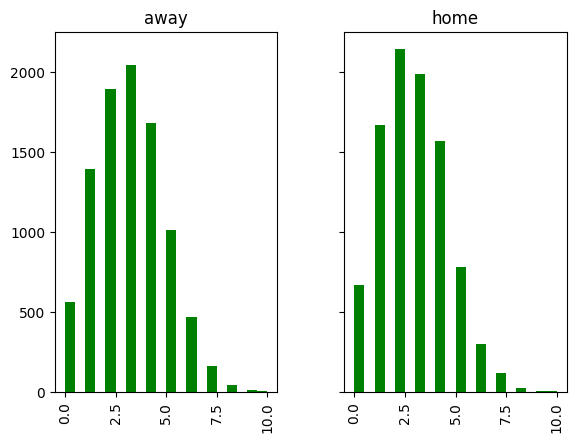

In [43]:
NHL_Game.hist(by='home_away', column='goals_against', color='green', bins=20, sharex=True, sharey=True)

Correlation Analysis

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

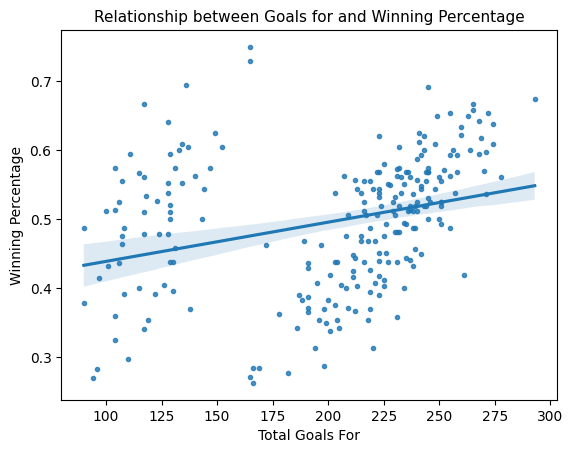

In [46]:
import seaborn as sns
sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.xlabel('Total Goals For')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [47]:
NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])

np.float64(0.3030250431918328)

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

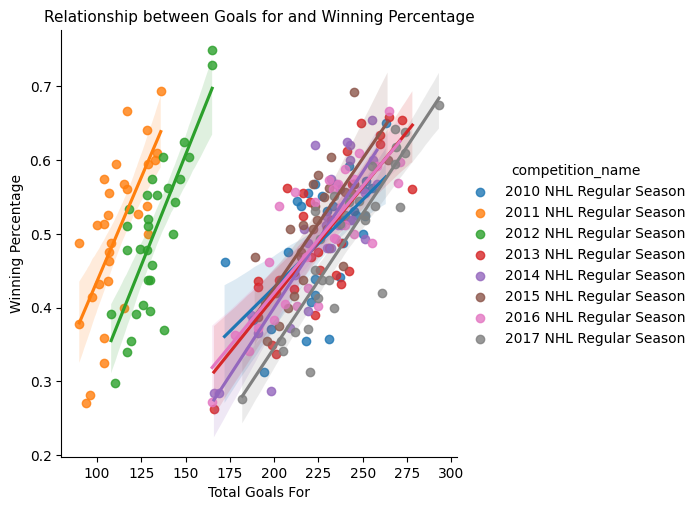

In [51]:
sns.lmplot(x='goals_for', y='win_pct', hue='competition_name', data=NHL_Team_R_Stats)
plt.xlabel('Total Goals For')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [54]:
NHL_Team_R_Stats=NHL_Team_R_Stats[NHL_Team_R_Stats.competition_name != "2011 NHL Regular Season"]
NHL_Team_R_Stats=NHL_Team_R_Stats[NHL_Team_R_Stats.competition_name != "2012 NHL Regular Season"]
NHL_Team_R_Stats

,tid,team_name,tricode,competition_name,type,win,goals_for,goals_against,game_count,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,Toronto Maple Leafs,TOR,2010 NHL Regular Season,2,36,223.0,259.0,82,368,426,46.0,0.439024,2.719512,3.158537
4,1,Toronto Maple Leafs,TOR,2013 NHL Regular Season,2,38,231.0,250.0,79,362,342,61.0,0.481013,2.924051,3.164557
5,1,Toronto Maple Leafs,TOR,2014 NHL Regular Season,2,29,209.0,258.0,78,319,343,54.0,0.371795,2.679487,3.307692
6,1,Toronto Maple Leafs,TOR,2015 NHL Regular Season,2,28,196.0,238.0,79,324,307,27.0,0.354430,2.481013,3.012658
8,1,Toronto Maple Leafs,TOR,2016 NHL Regular Season,2,40,255.0,246.0,82,321,321,69.0,0.487805,3.109756,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,Carolina Hurricanes,CAR,2014 NHL Regular Season,2,30,191.0,228.0,82,239,289,55.0,0.365854,2.329268,2.780488
365,66,Carolina Hurricanes,CAR,2015 NHL Regular Season,2,33,195.0,226.0,81,247,281,48.0,0.407407,2.407407,2.790123
366,66,Carolina Hurricanes,CAR,2016 NHL Regular Season,2,35,219.0,243.0,82,224,258,57.0,0.426829,2.670732,2.963415
367,66,Carolina Hurricanes,CAR,2017 NHL Regular Season,2,35,227.0,248.0,80,218,255,51.0,0.437500,2.837500,3.100000


Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

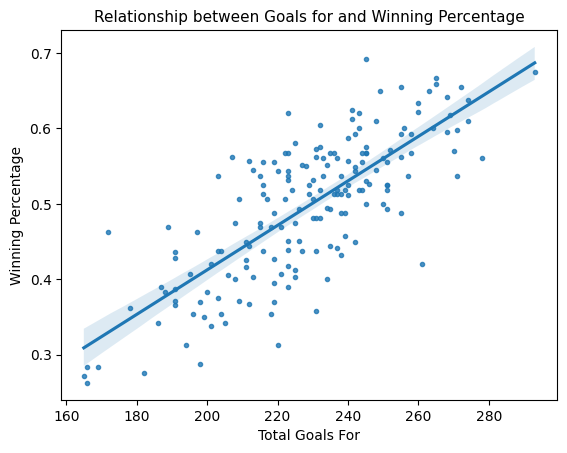

In [55]:
sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.xlabel('Total Goals For')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [56]:
NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])

np.float64(0.7684623749580161)

In [57]:
NHL_Team_R_Stats.to_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-Correlation/data/NHL_Team_R_Stats.csv", index=False)

In [58]:
NHL_Game.to_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-Correlation/data/NHL_Game2.csv", index=False)

In [59]:
NHL_Team_Stats.to_csv("C:/Users/trent/OneDrive/Documents/Repositories/NBA-Correlation/data/NHL_Team_Stats.csv", index=False)